## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# Combine the data into a single dataset
mice_data = pd.merge(pd.read_csv(mouse_metadata_path),
                     pd.read_csv(study_results_path),
                     how='outer', on='Mouse ID')

# Display the data table for preview
mice_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
print(f"The unique No. of unique Mice IDs is: {len(pd.unique(mice_data['Mouse ID']))}.")

The unique No. of unique Mice IDs is: 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mice_data[mice_data.duplicated(["Mouse ID","Timepoint"])]
mouse_ID = pd.DataFrame({"Mouse ID":mouse_duplicates["Mouse ID"].unique()})
mouse_ID =str(mouse_ID.iloc[0,0])
print (f"The duplicate Moause ID is: {mouse_ID}.")
# duplicate_ID

The duplicate Moause ID is: g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_data.loc[mice_data["Mouse ID"]==mouse_ID,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean = mice_data.drop(mice_data[mice_data["Mouse ID"]==mouse_ID].index)
mice_clean.reset_index(inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"The clean No. of unique Mice IDs is: {len(pd.unique(mice_clean['Mouse ID']))}.")

The clean No. of unique Mice IDs is: 248.


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_table_1= pd.DataFrame({"Mean": 
                         mice_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'].map("{:,.2f}".format),
                         "Median": 
                         mice_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)'].map("{:,.2f}".format),
                         "Variance": 
                         mice_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].map("{:,.2f}".format),
                         "Standard Deviation": 
                         mice_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].map("{:,.2f}".format),
                         "SEM":
                         mice_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].map("{:,.2f}".format),
                        })
statistics_table_1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

statistics_table_2 = mice_clean.groupby('Drug Regimen')
summary_stats_table_2 = statistics_table_2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


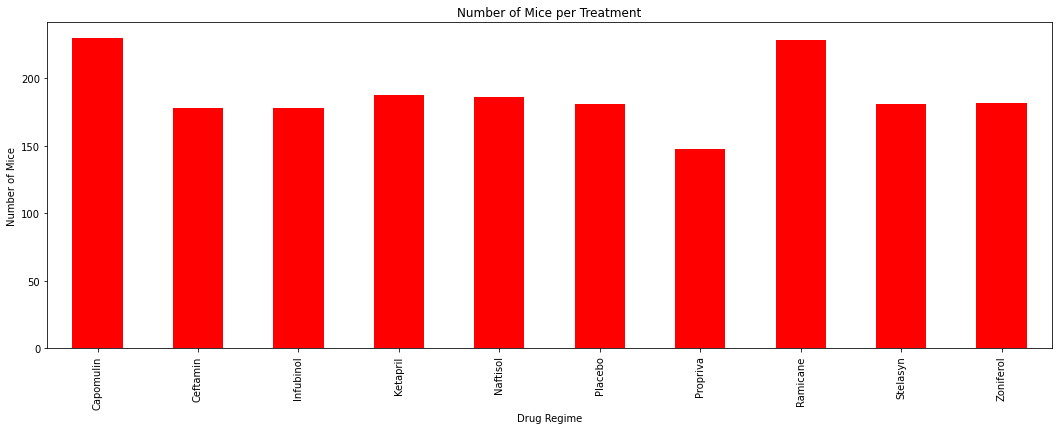

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_regimen = mice_clean.groupby("Drug Regimen").count()["Mouse ID"].plot(kind='bar',
                                                                            xlabel="Drug Regime",
                                                                            ylabel="Number of Mice",
                                                                            title="Number of Mice per Treatment",
                                                                            facecolor="red",figsize=(18,6),width=0.5)

Text(0, 0.5, 'Number of Mice')

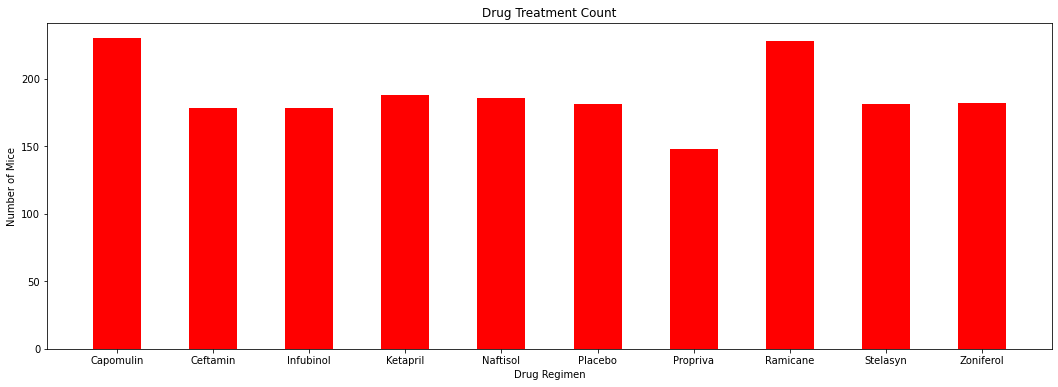

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_list = mice_clean.groupby(["Drug Regimen"]).count().index.tolist()
drug_count = (mice_clean.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
plt.figure(figsize=(18,6))
plt.bar(drug_list, drug_count, color='red', alpha=1, align="center", width = 0.5)

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = mice_clean.groupby(["Sex"]).count()["Mouse ID"]
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


# .plot.pie(figsize=(8, 8))
# plot = mice_sex.plot.pie(figsize=(8, 8))

NameError: name 'mouse_gender' is not defined

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
